In [31]:
!python ./trainSpeakerNet.py \
--eval \
--model ResNetSE34L \
--log_input True \
--trainfunc angleproto \
--save_path exps/test_lite \
--eval_frames 400 \
--test_list lists/veri_test.txt \
--initial_model pretrained_models/baseline_lite_ap.model

Embedding size is 512, encoder SAP.
Initialised AngleProto
Initialised Adam optimizer
Initialised step LR scheduler
Model has 1437080 parameters
Model pretrained_models/baseline_lite_ap.model loaded!
Reading 4700 of 4715: 116.89 Hz, embedding size 512
Computing 37700 of 37720: 4905.96 Hz

EER 2.1792


In [37]:
!python ./trainSpeakerNet.py \
--eval \
--model ResNetSE34V2 \
--log_input True \
--encoder_type ASP \
--n_mels 64 \
--trainfunc softmaxproto \
--save_path exps/test_v2 \
--eval_frames 400 \
--test_list lists/veri_test.txt \
--initial_model pretrained_models/baseline_v2_ap.model

Embedding size is 512, encoder ASP.
Initialised Softmax Loss
Initialised AngleProto
Initialised SoftmaxPrototypical Loss
Initialised Adam optimizer
Initialised step LR scheduler
Model has 11103416 parameters
Model pretrained_models/baseline_v2_ap.model loaded!
Reading 4700 of 4715: 48.46 Hz, embedding size 512
Computing 37700 of 37720: 5079.69 Hz

EER 1.1771


In [42]:
!ls data/voxceleb2 | wc -l

4953


In [ ]:
!python ./trainSpeakerNet.py \
--model ResNetSE34L \
--encoder_type SAP \
--n_mels 64 \
--batch_size 200 \
--scale 30 \
--margin 0.3 \
--nClasses 4953 \
--trainfunc amsoftmax \
--eval_frames 400 \
--save_path exps/scratch_given_model \
--train_list lists/train_list.txt \
--test_list lists/veri_test.txt


In [ ]:
!python ./trainSpeakerNet.py \
--eval \
--model ResNetSE34L \
--encoder_type SAP \
--batch_size 400 \
--n_mels 64 \
--scale 30 \
--margin 0.3 \
--nClasses 4953 \
--trainfunc amsoftmax \
--eval_frames 400 \
--save_path exps/scratch_given_model \
--train_list lists/train_list.txt \
--test_list lists/veri_test.txt \
--initial_model exps/scratch_given_model/model/model00000500.model

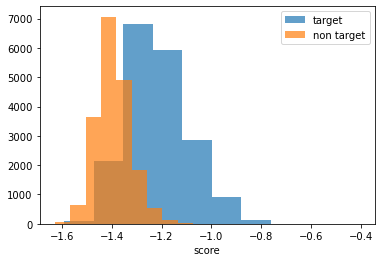

In [89]:
%run plot_score_histograms.py

In [12]:
!python ./trainSpeakerNet.py \
--model VGGVox \
--encoder_type TAP \
--n_mels 64 \
--batch_size 200 \
--nPerSpeaker 2 \
--nClasses 4953 \
--trainfunc angleproto \
--eval_frames 400 \
--save_path exps/scratch_vgg_model \
--train_list lists/train_list.txt \
--test_list lists/veri_test.txt

Embedding size is 512, encoder TAP.
Initialised AngleProto
Initialised Adam optimizer
Initialised step LR scheduler
Model has 3769282 parameters
Model exps/scratch_vgg_model/model/model000000500.model loaded from previous state!
/home/alumnos/e266041/.conda/envs/dlasp_lab1/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
config None
max_frames 200
eval_frames 400
batch_size 200
max_seg_per_spk 100
nDataLoaderThread 5
augment False
test_interval 10
max_epoch 500
trainfunc angleproto
optimizer adam
schedul

In [98]:
!python ./trainSpeakerNet.py \
--eval \
--model VGGVox \
--encoder_type TAP \
--batch_size 400 \
--n_mels 64 \
--nPerSpeaker 2 \
--nClasses 4953 \
--trainfunc angleproto \
--eval_frames 400 \
--save_path exps/scratch_vgg_model \
--train_list lists/train_list.txt \
--test_list lists/veri_test.txt \
--initial_model exps/scratch_vgg_model/model/model00000500.model

Embedding size is 512, encoder TAP.
Initialised AngleProto
Initialised Adam optimizer
Initialised step LR scheduler
Model has 3769282 parameters
Model exps/scratch_vgg_model/model/model000000500.model loaded from previous state!
/home/alumnos/e266041/.conda/envs/dlasp_lab1/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Reading 4700 of 4715: 238.27 Hz, embedding size 512
Computing 37700 of 37720: 4801.41 Hz

EER 16.9406


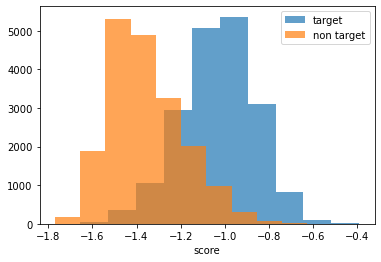

In [99]:
import numpy as np
import matplotlib.pyplot as plt

scores_file = 'exps/scratch_vgg_model/result/scores_test.txt' # Modify to point at your scores file 
keys_file = 'lists/veri_test.txt'

all_scores = np.loadtxt(scores_file, usecols=[0])
all_trials_scores = np.loadtxt(scores_file, usecols=[1,2], dtype='str')

all_keys = np.loadtxt(keys_file, usecols=[0])
all_trials_keys = np.loadtxt(keys_file, usecols=[1,2], dtype='str')


target_scores = all_scores[all_keys==1]
nontarget_scores = all_scores[all_keys==0]


plt.hist(target_scores, alpha=0.7)
plt.hist(nontarget_scores, alpha=0.7)

plt.xlabel('score')
plt.legend(('target','non target')) 
plt.show()

In [15]:
!python ./trainSpeakerNet.py \
--model VGGVoxL \
--encoder_type TAP \
--batch_size 200 \
--nPerSpeaker 2 \
--nClasses 4953 \
--trainfunc angleproto \
--eval_frames 400 \
--save_path exps/smaller2_vgg_model \
--train_list lists/train_list.txt \
--test_list lists/veri_test.txt

Embedding size is 512, encoder TAP.
Initialised AngleProto
Initialised Adam optimizer
Initialised step LR scheduler
Model has 1997890 parameters
config None
max_frames 200
eval_frames 400
batch_size 200
max_seg_per_spk 100
nDataLoaderThread 5
augment False
test_interval 10
max_epoch 500
trainfunc angleproto
optimizer adam
scheduler steplr
lr 0.001
lr_decay 0.95
weight_decay 0
hard_prob 0.5
hard_rank 10
margin 1
scale 15
nPerSpeaker 2
nClasses 4953
initial_model 
save_path exps/smaller2_vgg_model
train_list lists/train_list.txt
test_list lists/veri_test.txt
train_path data/voxceleb2
test_path data/voxceleb1
musan_path data/musan_split
rir_path data/RIRS_NOISES/simulated_rirs
n_mels 40
log_input False
model VGGVoxL
encoder_type TAP
nOut 512
eval False
Model has 1997890 parameters
2021-11-15 12:52:39 1 Training VGGVoxL with LR 0.001000...
Processing (3600) Loss 5.259925 TEER/TAcc 1.278% - 1450.11 Hz Loss 5.287781 TEER/TAcc 1.167% - 1455.65 Hz 
2021-11-15 12:52:42 LR 0.001000, TEER/TAcc 1.

In [23]:
!python ./trainSpeakerNet.py \
--eval \
--model VGGVoxL \
--encoder_type TAP \
--batch_size 400 \
--nPerSpeaker 2 \
--nClasses 4953 \
--trainfunc angleproto \
--eval_frames 400 \
--save_path exps/smaller2_vgg_model \
--train_list lists/train_list.txt \
--test_list lists/veri_test.txt \
--initial_model exps/smaller2_vgg_model/model/model00000500.model

Embedding size is 512, encoder TAP.
Initialised AngleProto
Initialised Adam optimizer
Initialised step LR scheduler
Model has 1997890 parameters
Model exps/smaller2_vgg_model/model/model000000500.model loaded from previous state!
/home/alumnos/e266041/.conda/envs/dlasp_lab1/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Reading 4700 of 4715: 287.56 Hz, embedding size 512
Computing 37700 of 37720: 5098.41 Hz

EER 17.4231


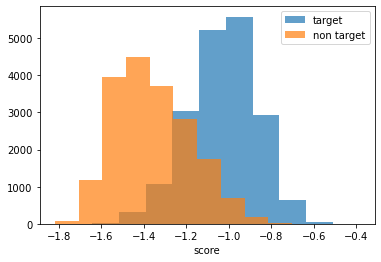

In [24]:
import numpy as np
import matplotlib.pyplot as plt

scores_file = 'exps/smaller2_vgg_model/result/scores_test.txt' # Modify to point at your scores file 
keys_file = 'lists/veri_test.txt'

all_scores = np.loadtxt(scores_file, usecols=[0])
all_trials_scores = np.loadtxt(scores_file, usecols=[1,2], dtype='str')

all_keys = np.loadtxt(keys_file, usecols=[0])
all_trials_keys = np.loadtxt(keys_file, usecols=[1,2], dtype='str')


target_scores = all_scores[all_keys==1]
nontarget_scores = all_scores[all_keys==0]


plt.hist(target_scores, alpha=0.7)
plt.hist(nontarget_scores, alpha=0.7)

plt.xlabel('score')
plt.legend(('target','non target')) 
plt.show()